19BCB0007 - PATIL DARSHAN RAJKUMAR

# **Principal Component Analysis (PCA)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

In [ ]:
df = pd.read_csv('bill_authentication.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.shape

(1372, 5)

In [ ]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
print(df.columns)

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')


In [ ]:
df.notnull()

,Variance,Skewness,Curtosis,Entropy,Class
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
1367,True,True,True,True,True
1368,True,True,True,True,True
1369,True,True,True,True,True
1370,True,True,True,True,True


In [ ]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [ ]:
df.corr()

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


Text(0.5, 1.0, 'Correlation Between Different Features')

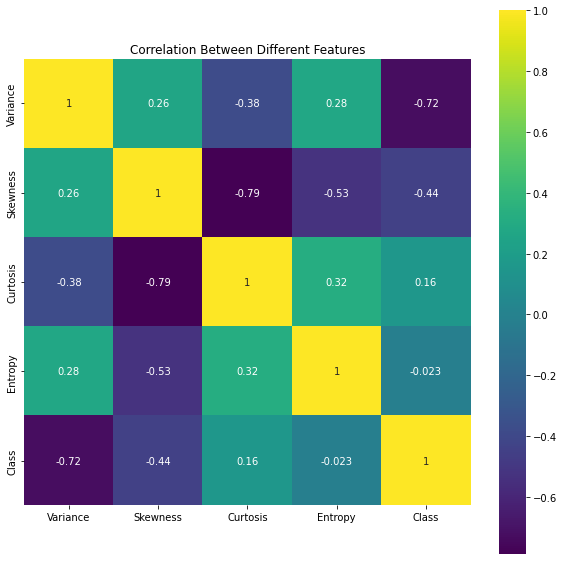

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, square=True,annot=True,cmap='viridis')

plt.title('Correlation Between Different Features')

In [ ]:
X = df.drop('Class', 1)
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [ ]:
y = df['Class']
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [ ]:
print(X.shape)
print(y.shape)

(1372, 4)
(1372,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Applying PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X = pca.fit_transform(X)
X_test = pca.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
pca_covar=pca.get_covariance()
pca_covar

array([[  8.08129912,   4.40508287,  -4.66632326,   1.65333797],
       [  4.40508287,  34.44570968, -19.90511909,  -6.490033  ],
       [ -4.66632326, -19.90511909,  18.57635938,   2.88724129],
       [  1.65333797,  -6.490033  ,   2.88724129,   4.4142562 ]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.76132409, 0.1419049 , 0.06701767, 0.02975334])

# **Using 1 Principal Component**

In [ ]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X = pca1.fit_transform(X)
X_test1 = pca1.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier(max_depth=2, random_state=0)
classifier1.fit(X_train1, y_train)
y_pred1 = classifier1.predict(X_test1)

In [ ]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[157   0]
 [118   0]]


Text(0.5, 15.0, 'Predicted')

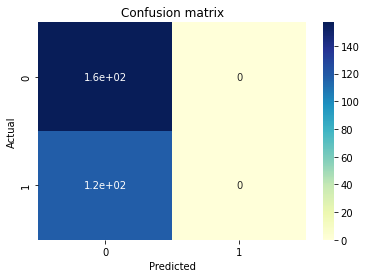

In [ ]:
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report\n ' + classification_report(y_test, y_pred1))

Classification Report
               precision    recall  f1-score   support

           0       0.57      1.00      0.73       157
           1       0.00      0.00      0.00       118

    accuracy                           0.57       275
   macro avg       0.29      0.50      0.36       275
weighted avg       0.33      0.57      0.41       275



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Using 2 Principal Component**

In [ ]:
pca2 = PCA(n_components=2)
X_train2 = pca2.fit_transform(X_train)
X_test2 = pca2.transform(X_test)

In [ ]:
classifier2 = RandomForestClassifier(max_depth=2, random_state=0)
classifier2.fit(X_train2, y_train)

y_pred2 = classifier2.predict(X_test2)

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[104  53]
 [118   0]]


Text(0.5, 15.0, 'Predicted')

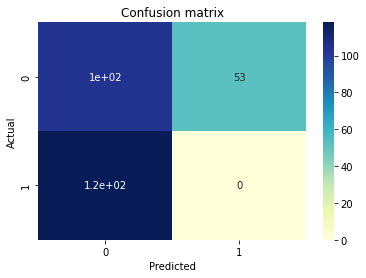

In [ ]:
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report\n ' + classification_report(y_test, y_pred2))

Classification Report
               precision    recall  f1-score   support

           0       0.47      0.66      0.55       157
           1       0.00      0.00      0.00       118

    accuracy                           0.38       275
   macro avg       0.23      0.33      0.27       275
weighted avg       0.27      0.38      0.31       275



# **Using 3 Principal Component**

In [ ]:
pca3 = PCA(n_components=3)
X_train3 = pca3.fit_transform(X_train)
X_test3 = pca3.transform(X_test)

In [ ]:
classifier3 = RandomForestClassifier(max_depth=2, random_state=0)
classifier3.fit(X_train3, y_train)

y_pred3 = classifier3.predict(X_test3)

In [ ]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[78 79]
 [88 30]]


Text(0.5, 15.0, 'Predicted')

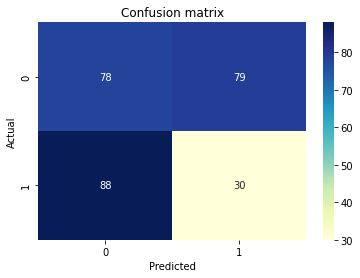

In [ ]:
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report\n ' + classification_report(y_test, y_pred3))

Classification Report
               precision    recall  f1-score   support

           0       0.47      0.50      0.48       157
           1       0.28      0.25      0.26       118

    accuracy                           0.39       275
   macro avg       0.37      0.38      0.37       275
weighted avg       0.39      0.39      0.39       275

